In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Halfspace is 2x+y+1<0

halfspace_weights = np.array([-1, 1]).T
halfspace_offset = 1

def is_in_halfspace(v):
    return halfspace_weights.T @ v + halfspace_offset < 0

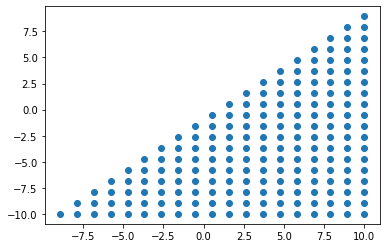

In [74]:
points = []
for x in np.linspace(-10, 10, 20):
    for y in np.linspace(-10, 10, 20):
        v = np.array([x,y]).T
        if is_in_halfspace(v):
            points.append(v)
points = np.array(points)

plt.scatter(points[:,0], points[:,1])
plt.show()

In [75]:
# Transformation is:
# x' = 2x + y + 1
# y' = x - 2y

transformation_linear = np.array([[2, 1], [1, -2]]).T
transformation_offset = np.array([1, 0]).T

def transformation(v):
    return transformation_linear @ v + transformation_offset

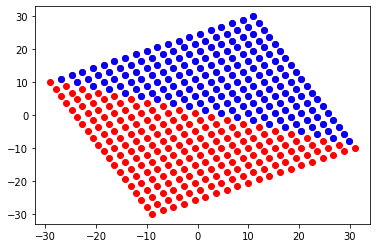

In [76]:
new_points = []
for p in points:
    new_points.append(transformation(p))
new_points = np.array(new_points)

all_reference_points = []
for x in np.linspace(-10, 10, 20):
    for y in np.linspace(-10, 10, 20):
        v = transformation(np.array([x,y]).T)
        all_reference_points.append(v)
all_reference_points = np.array(all_reference_points)

plt.scatter(all_reference_points[:,0], all_reference_points[:,1], c='r')
plt.scatter(new_points[:,0], new_points[:,1], c='b')

plt.show()

In [77]:
transformed_halfspace_weights = halfspace_weights.T @ np.linalg.inv(transformation_linear)
transformed_halfspace_offset = halfspace_offset - halfspace_weights @ np.linalg.inv(transformation_linear) @ transformation_offset

print(transformed_halfspace_weights)
print(halfspace_weights)

def is_in_transformed_halfspace(v):
    res = transformed_halfspace_weights.T @ v + transformed_halfspace_offset
    return res < 0

[-0.2 -0.6]
[-1  1]


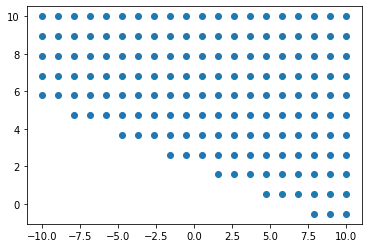

In [78]:
points = []
for x in np.linspace(-10, 10, 20):
    for y in np.linspace(-10, 10, 20):
        v = np.array([x,y]).T
        if is_in_transformed_halfspace(v):
            points.append(v)
points = np.array(points)

plt.scatter(points[:,0], points[:,1])
plt.show()